# Movie Recommendation system 

**Import required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Dataset**

In [2]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 74.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,500.500000,288.819436,1.0,250.75,500.500,750.250,1000.00
Year,1000.0,2012.783000,3.205962,2006.0,2010.00,2014.000,2016.000,2016.00
Runtime (Minutes),1000.0,113.172000,18.810908,66.0,100.00,111.000,123.000,191.00
Rating,1000.0,6.723200,0.945429,1.9,6.20,6.800,7.400,9.00
Votes,1000.0,169808.255000,188762.647518,61.0,36309.00,110799.000,239909.750,1791916.00
Revenue (Millions),872.0,82.956376,103.253540,0.0,13.27,47.985,113.715,936.63
Metascore,936.0,58.985043,17.194757,11.0,47.00,59.500,72.000,100.00


In [6]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [7]:
df.shape

(1000, 12)

**Data cleaning**

In [8]:
df = df.loc[:,['Title','Genre','Rating','Votes']]

In [9]:
df

,Title,Genre,Rating,Votes
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1,757074
1,Prometheus,"Adventure,Mystery,Sci-Fi",7.0,485820
2,Split,"Horror,Thriller",7.3,157606
3,Sing,"Animation,Comedy,Family",7.2,60545
4,Suicide Squad,"Action,Adventure,Fantasy",6.2,393727
...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery",6.2,27585
996,Hostel: Part II,Horror,5.5,73152
997,Step Up 2: The Streets,"Drama,Music,Romance",6.2,70699
998,Search Party,"Adventure,Comedy",5.6,4881


# K-Means Clustering

**Feature Scaling of data**

In [10]:
x = df.iloc[:,2:4].values

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[:,0:2]=sc.fit_transform(x[:,0:2])

Plot the scatter plot of movies Rating v/s Votes 

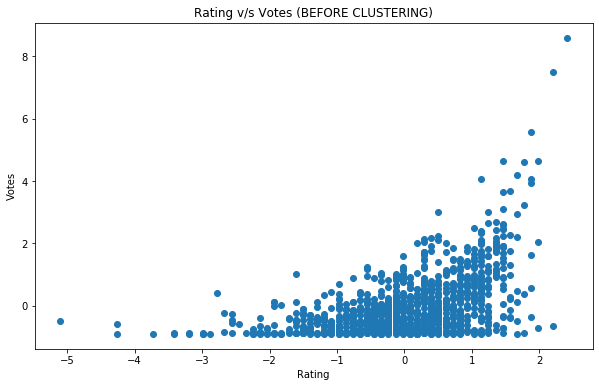

In [12]:
plt.figure(figsize = (10,6))
plt.scatter(x[:,0],x[:,1])
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating v/s Votes (BEFORE CLUSTERING)')
plt.show()

**Fit the K-means clustering model to the data**

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i,init='k-means++')
    k_means.fit(x[:,0:2])
    wcss.append(k_means.inertia_)
print(wcss)

[1999.9999999999998, 1124.0390365486496, 720.0272771413044, 566.545724605227, 436.8280557709082, 353.12310782908617, 299.85617154533327, 253.9263186348611, 228.59977312109962, 206.25819878849853]


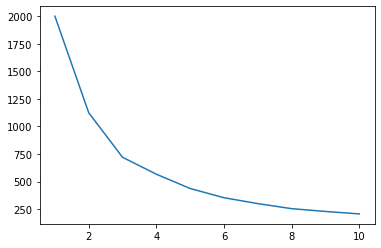

In [14]:
x_range = range(1,11)
plt.plot(x_range,wcss)

In [15]:
k_means = KMeans(n_clusters = 4,init='k-means++')
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
y_kmeans = k_means.predict(x)

In [17]:
y_kmeans

array([3, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 3, 1, 2, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 0, 3, 1,
       2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 3, 3, 1, 0, 3, 2, 3, 1, 1, 1, 2, 3,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 3, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 3, 2, 0, 2, 2, 1, 2, 0,
       2, 1, 1, 2, 1, 1, 3, 2, 1, 0, 1, 1, 3, 2, 2, 1, 1, 0, 2, 1, 0, 1,
       2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1,
       0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2,

**Plot the scatter plot of movies Rating v/s Votes**

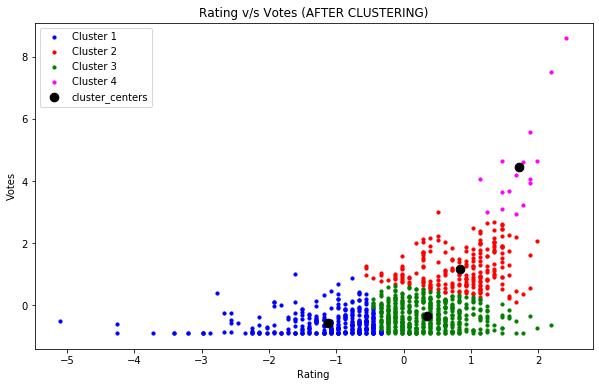

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=10,c='blue',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=10,c='red',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=10,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=10,c='magenta',label='Cluster 4')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=75,c='black',label='cluster_centers')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating v/s Votes (AFTER CLUSTERING)')
plt.legend()
plt.show()

Above scatter plot shows that the movies in the given dataset are divided into 4 clusters.


# K Nearest Neighbors

In [19]:
df.head()

,Title,Genre,Rating,Votes
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1,757074
1,Prometheus,"Adventure,Mystery,Sci-Fi",7.0,485820
2,Split,"Horror,Thriller",7.3,157606
3,Sing,"Animation,Comedy,Family",7.2,60545
4,Suicide Squad,"Action,Adventure,Fantasy",6.2,393727


In [20]:
pd.DataFrame(df["Genre"].str.get_dummies(sep=",")).head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
movie_features = pd.concat([df["Genre"].str.get_dummies(sep=","),df[["Rating"]]],axis=1)

In [22]:
movie_features.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Rating
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8.1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,7.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7.3
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7.2
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.2


In [23]:
movie_features.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'Rating'],
      dtype='object')

In [24]:
movie_features.iloc[:,:-1].sum()

Action       303
Adventure    259
Animation     49
Biography     81
Comedy       279
Crime        150
Drama        513
Family        51
Fantasy      101
History       29
Horror       119
Music         16
Musical        5
Mystery      106
Romance      141
Sci-Fi       120
Sport         18
Thriller     195
War           13
Western        7
dtype: int64

**Plotting Genres v/s no. of movies plot**

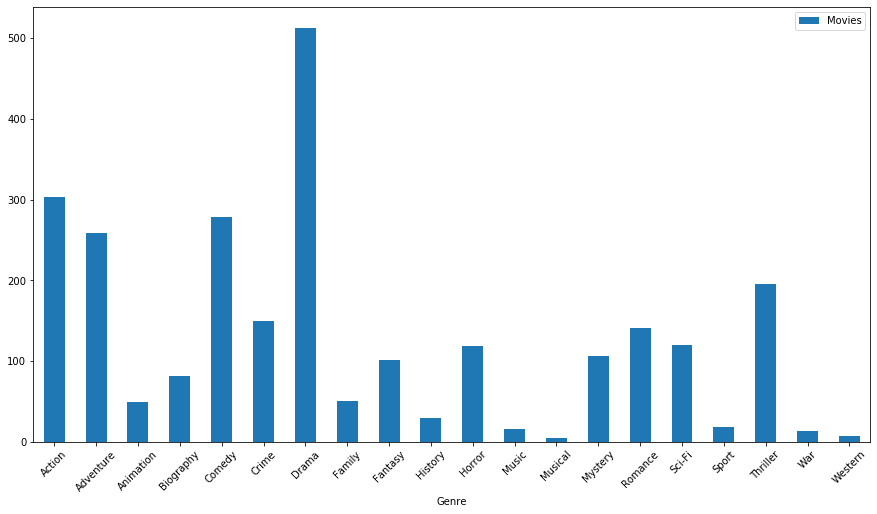

In [25]:
df1 = pd.DataFrame({'Genre':movie_features.iloc[:,:-1].sum().keys(),'Movies':movie_features.iloc[:,:-1].sum().values})
df1.plot.bar(x='Genre', y='Movies', rot=45,figsize=(15,8))

**Feature Scaling**

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
movie_features = sc.fit_transform(movie_features)

**Fitting the KNN model with data**

In [27]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10)
knn.fit(movie_features)
distances, indices = knn.kneighbors(movie_features)

In [28]:
def get_index_from_Title(Title):
    return list(df[df["Title"]==Title].index)[0]

def Recommendations(query):
    found_id = get_index_from_Title(query)
    for i in indices[found_id][0:]:
        print(df.loc[i]["Title"])

# Recommend the movies

In [29]:
Recommendations('The Perks of Being a Wallflower')

The Perks of Being a Wallflower
La vie d'Adèle
The Fault in Our Stars
Dear Zindagi
Seven Pounds
Brooklyn
Me Before You
Blue Valentine
Up in the Air
Jane Eyre


In [30]:
Recommendations('Guardians of the Galaxy') 

Mad Max: Fury Road
Guardians of the Galaxy
Star Trek
X-Men: Days of Future Past
Captain America: Civil War
Edge of Tomorrow
Iron Man
Rogue One
X: First Class
Captain America: The Winter Soldier


In [31]:
Recommendations('The Dark Knight')

The Dark Knight
Sicario
The Accountant
Looper
Shooter
Chappie
Gangster Squad
Drive
Need for Speed
Faster
